In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("operadata_2904.csv")

In [13]:
df.drop(columns=["IOT_ASSET_CODE", "LSWorkType", "Monthvalues", "YearValues",
                 "MthYr", "Asset_Description", "PlantMasterDescription",
                 "FGDescription", "LFProductivityPercent", "FSFProductivityPercent",
                 "AssetMonthYr", "SFProductivityPercent", "UtilizationStatus_Month"],
        inplace=True, errors='ignore')
df.fillna(0, inplace=True)

df = df.select_dtypes(include=[np.number])

In [14]:
target_column = 'WorkDoneQTY_Considered'  # Change this if needed
feature_columns = [col for col in df.columns if col != target_column]

X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [15]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Linear Regression:")
print("R2 Score:", r2_score(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print()

print("Random Forest:")
print("R2 Score:", r2_score(y_test, rf_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))


plt.figure(figsize=(12, 5))



Linear Regression:
R2 Score: 0.9881641322478079
RMSE: 2051.314181724586

Random Forest:
R2 Score: 0.9949768146915028
RMSE: 1336.3546540344937


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

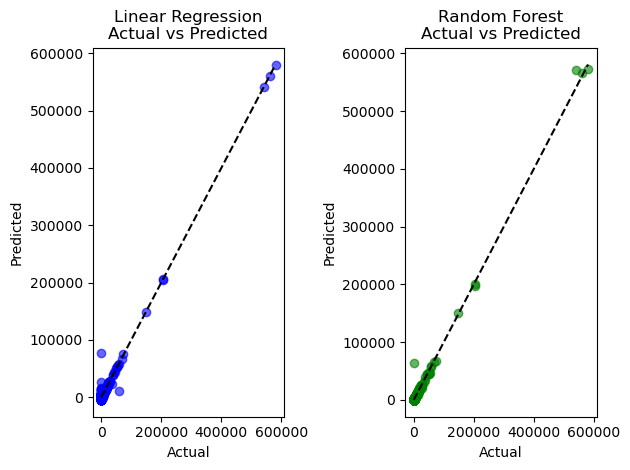

In [16]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Linear Regression\nActual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title("Random Forest\nActual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()